# Selecting the Best Markets for Advertisement
In this project we will assume we are working for a company which offers programming courses focusing on web development and mobile development, as well as other domains.

The goal in this project will be to determine the two best markets to advertise our company's product in.

## Exploring the Data
A good candidate for relevant and easily accessible data is freeCodeCamp's 2017 New Coder Survey since their survey attracted many new coders with various interests. The company is marketed as a free e-learning platform that attracts new coders with various interests, making the survey ideal for our analysis. The cleaned survey data is available [here](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
df.shape

(18175, 136)

In [3]:
pd.set_option('display.max_columns', 500)
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

## Checking Sample Representativity
Since we are interested in the entire population of new coders that may be interested in the courses we offer, we need to verify whether the sample surveyed is representative of our target population.

Ultimately, we would like to find out:
- Where new coders (population) are located.
- Which locations contain the greatest number of new coders.
- How much money the population is willing to spend on course content.

In [4]:
# Frequency Distribution of the JobRoleInterst column (Percentages)
df['JobRoleInterest'].value_counts(normalize=True) * 100

Full-Stack Web Developer                                                                                                                                                                                                11.770595
  Front-End Web Developer                                                                                                                                                                                                6.435927
  Data Scientist                                                                                                                                                                                                         2.173913
Back-End Web Developer                                                                                                                                                                                                   2.030892
  Mobile Developer                                                                              

From a brief look at the frequency table, it appears that there are people who are focused on a single topic, while others are interested in more than one subject. Regardless, this sample is still representative since our company's platform offers a variety of subjects.

In [5]:
# Find Distribution of Number of interests
jobRoles_noNA = df['JobRoleInterest'].dropna()
jobRoles_split = jobRoles_noNA.str.split(pat=',')

# Count the number of different roles each person listed
jobRoles_counts = jobRoles_split.apply(lambda x: len(x))
jobRoles_counts.value_counts(normalize=True) * 100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

A closer look at our sample indicates that 31.7% students surveyed are focused on learning a single subject. The rest of the sampled students are interested in learning more than one topic.

Since the focus of our company's platform is web and mobile development, let's find out how many people are interested in either one of these subjects.

In [6]:
# Find out distribution of people interested in web / mobile Dev
web_mobile = df['JobRoleInterest'].str.contains('Web|Mobile',
                                                regex=True, case=False)

web_mobile_dist = web_mobile.value_counts(normalize=True) * 100
print(web_mobile_dist)

True     86.312929
False    13.687071
Name: JobRoleInterest, dtype: float64


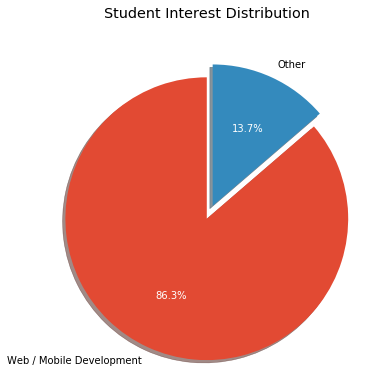

In [7]:
# Pie chart
labels = ['Web / Mobile Development', 'Other']
explode = (0, 0.1)  # Explode 2nd division

plt.style.use('ggplot')
fig1, ax1 = plt.subplots(figsize=(6,6))
_, _, autotexts = ax1.pie(web_mobile_dist, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Student Interest Distribution', y = 1.08)

for autotext in autotexts:
    autotext.set_color('white')
plt.show()

From the chart above, it is obvious that a large majority (86.3%) of candidates have interest in web and/or mobile development (the company's focus).

Based on the information gathered, our sample has the correct target audience for our purposes.

## Population Distribution of New Coders
The dataframe we are working with with already contains information with regards to where people currently live in the `CountryLive` column. We will use this information to determine which locations our ads should be targeting.

In [8]:
jobInterest = df[df['JobRoleInterest'].notnull()].copy()
CountryLive_noNA = jobInterest['CountryLive'].dropna()
country_freq = CountryLive_noNA.value_counts()
country_percent = CountryLive_noNA.value_counts(normalize=True) * 100

CountryLive_dist = pd.DataFrame({'Absolute':country_freq, 'Percentage(%)':country_percent})
CountryLive_dist.head(10)

,Absolute,Percentage(%)
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


Based on the results of the frequency table, it seems it would be beneficial to select the United States of America and India as our target markets for advertisement.

## Budget for Learning
While it is important to know the geographical distribution of our target audience, it is also important to determine which markets are willing to spend money on learning for our company to be profitable.

We will also focus our analysis on USA, India, United Kingdom, and Canada, since these markets are where new coders tend to reside in the most.

In [9]:
# Replace any 0 values to 1 to avoid divison errors later
jobInterest['MonthsProgramming'].replace(to_replace=0, value=1, inplace=True)

# New Column for Monthly Budget
jobInterest['MonthlyBudget'] = jobInterest['MoneyForLearning'] / jobInterest['MonthsProgramming']

In [10]:
jobInterest['MonthlyBudget'].value_counts(dropna=False)

0.000000        3092
NaN              675
50.000000        128
25.000000        120
16.666667        118
                ... 
3.076923           1
10.833333          1
30000.000000       1
312.500000         1
611.111111         1
Name: MonthlyBudget, Length: 494, dtype: int64

In [11]:
# Drop rows with null values in MonthlyBudget or CountryLive
jobInterest = jobInterest.dropna(subset=['MonthlyBudget', 'CountryLive'])

In [12]:
# Group MonthlyBudget data by country of residence
countryExpense = jobInterest[[ 'CountryLive','MonthlyBudget']]
avgExpenseByCountry = countryExpense.groupby('CountryLive').mean()

# Isolate countries of interest
avgExpenseByMarket = avgExpenseByCountry.loc[['United States of America',
                                             'India',
                                             'United Kingdom',
                                             'Canada']]

avgExpenseByMarket.sort_values('MonthlyBudget', ascending=False)

,MonthlyBudget
CountryLive,
United States of America,227.997996
India,135.100982
Canada,113.510961
United Kingdom,45.534443


Based on these numbers, it seems abnormal that India would have a higher monthly budget than Canada and the United Kingdom (based on GDP per capita).

## Identifying and Dealing with Outliers
First, we'll investigate if there are any outliers in our data by generating a box plot for each market of interest.

In [13]:
# Seperate MonthlyBudget data by country
expense_USA = countryExpense.loc[countryExpense['CountryLive']=='United States of America']
expense_India = countryExpense.loc[countryExpense['CountryLive']=='India']
expense_Canada = countryExpense.loc[countryExpense['CountryLive']=='Canada']
expense_UK = countryExpense.loc[countryExpense['CountryLive']=='United Kingdom']

marketExpense = pd.concat([expense_USA, expense_India, expense_Canada, expense_UK]).reset_index()

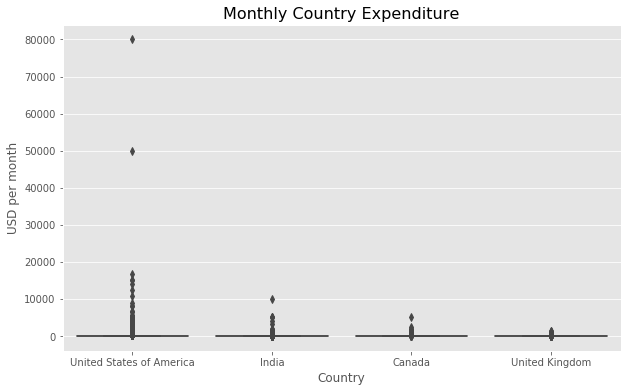

In [14]:
# Generate Boxplots
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="CountryLive", y="MonthlyBudget", data=marketExpense)
plt.title('Monthly Country Expenditure', fontsize = 16)
plt.ylabel('USD per month')
plt.xlabel('Country')
plt.show()

From the plot above it is evident that there are extreme outliers for the United States of America in terms of amount spent per month. Let's remove the data points where monthly expenditure exceeds `$20000`.

In [15]:
countryExpense = countryExpense.loc[countryExpense['MonthlyBudget']<20000]

Next let's recompute the mean values and boxplot for each country.

In [16]:
# Recompute mean values
avgExpenseByCountry = countryExpense.groupby('CountryLive').mean()

# Isolate countries of interest
avgExpenseByMarket = avgExpenseByCountry.loc[['United States of America',
                                             'India',
                                             'United Kingdom',
                                             'Canada']]

avgExpenseByMarket.sort_values('MonthlyBudget', ascending=False)

,MonthlyBudget
CountryLive,
United States of America,183.800110
India,135.100982
Canada,113.510961
United Kingdom,45.534443


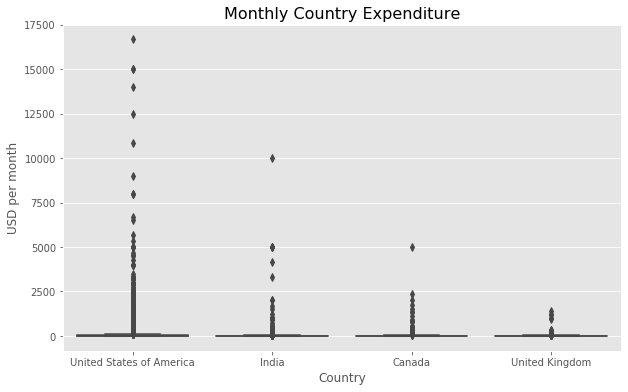

In [17]:
# Seperate MonthlyBudget data by country
expense_USA = countryExpense.loc[countryExpense['CountryLive']=='United States of America']
expense_India = countryExpense.loc[countryExpense['CountryLive']=='India']
expense_Canada = countryExpense.loc[countryExpense['CountryLive']=='Canada']
expense_UK = countryExpense.loc[countryExpense['CountryLive']=='United Kingdom']

marketExpense = pd.concat([expense_USA, expense_India, expense_Canada, expense_UK]).reset_index()

# Generate Boxplots
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="CountryLive", y="MonthlyBudget", data=marketExpense)
plt.title('Monthly Country Expenditure', fontsize = 16)
plt.ylabel('USD per month')
plt.xlabel('Country')
plt.show()

We see that there are still extreme outliers for USA with individuals spending greater than `$6000` per month on average. India also has extreme outliers for people spending greater than `$3000` per month on average. Lastly Canada has an outlier who spends greater than `$4000` per month on average.

Let's remove these outliers and re-compute / re-plot.

In [18]:
outliers_USA = countryExpense.loc[(countryExpense['MonthlyBudget']>6000) & 
                                 (countryExpense['CountryLive']=='United States of America')]

outliers_India = countryExpense.loc[(countryExpense['MonthlyBudget']>3000) & 
                                 (countryExpense['CountryLive']=='India')]

outliers_Canada = countryExpense.loc[(countryExpense['MonthlyBudget']>4000) & 
                                 (countryExpense['CountryLive']=='Canada')]

# Drop outliers
countryExpense = countryExpense.drop(outliers_USA.index)\
                            .drop(outliers_India.index)\
                            .drop(outliers_Canada.index)

In [19]:
# Recompute mean values
avgExpenseByCountry = countryExpense.groupby('CountryLive').mean()

# Isolate countries of interest
avgExpenseByMarket = avgExpenseByCountry.loc[['United States of America',
                                             'India',
                                             'United Kingdom',
                                             'Canada']]

avgExpenseByMarket.sort_values('MonthlyBudget', ascending=False)

,MonthlyBudget
CountryLive,
United States of America,142.654608
Canada,93.065400
India,65.758763
United Kingdom,45.534443


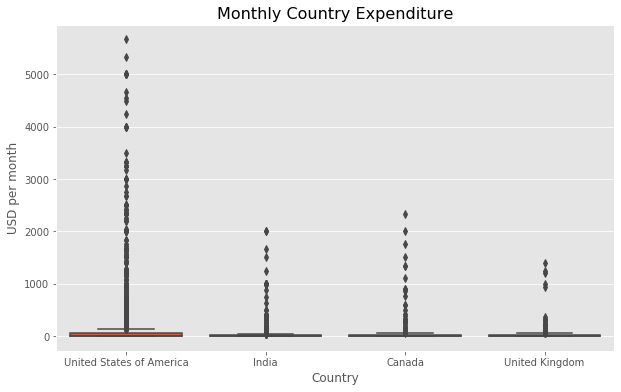

In [20]:
# Seperate MonthlyBudget data by country
expense_USA = countryExpense.loc[countryExpense['CountryLive']=='United States of America']
expense_India = countryExpense.loc[countryExpense['CountryLive']=='India']
expense_Canada = countryExpense.loc[countryExpense['CountryLive']=='Canada']
expense_UK = countryExpense.loc[countryExpense['CountryLive']=='United Kingdom']

marketExpense = pd.concat([expense_USA, expense_India, expense_Canada, expense_UK]).reset_index()

# Generate Boxplots
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="CountryLive", y="MonthlyBudget", data=marketExpense)
plt.title('Monthly Country Expenditure', fontsize = 16)
plt.ylabel('USD per month')
plt.xlabel('Country')
plt.show()

## Selecting the Best Markets

In [21]:
marketExpense['CountryLive'].value_counts(normalize=True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

Based on the distributions of monthly expenditures in the boxplots presented and the geographic distribution of the target audience, an obvious choice would be to advertise in the United States of America. The second choice will be Canada due to this market having the second highest average monthly expenditure, as well as a decently size target population.

An alternative choice to Canada would be India since despite having a lower average monthly expenditure, there is almost twice as many potential customers. Regardless, Canada will remain our second choice since the company could potentially save advertising costs by staying within North America, rather than marketing overseas.